In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon, MultiPolygon
from shapely import wkt
import re
import matplotlib.pyplot as plt
import random

### Setup
Run the next 3 cells to get `polygon_df` working. This should initialize the `Polygon` objects within the dataframe as well. The original file had `Polygon` and `MultiPolygon`. To further simplify the geometry, `MultiPolygons` are converted to single `Polygons` by selecting the largest sub-`Polygon` in the `MultiPolygon` object. 

In [2]:
polygon_df = pd.read_csv('../raw/all_polygons.csv')

In [3]:
def convert_to_polygon(wkt_string):
    try:
        return wkt.loads(wkt_string)
    except Exception as e:
        print(f"Error parsing WKT: {e}")
        return None

def multi_to_single_poly(multipoly):
    if isinstance(multipoly, MultiPolygon):
        return max(multipoly.geoms, key=lambda x: x.area)
    else:
        return multipoly

In [4]:
polygon_df.geometry = polygon_df.geometry.apply(convert_to_polygon)
polygon_df.geometry = polygon_df.geometry.apply(multi_to_single_poly)
# gdf = gpd.GeoDataFrame(polygon_df, geometry='geometry')
# gdf.set_crs('EPSG:4326', inplace=True)
# gdf.to_file("../raw/no_climate_firezones.shp")


In [ ]:
# gdf = gpd.read_file("../raw/no_climate_firezones.shp")
# gdf.head()

,DOY,YYYYMMDD,YEAR,FIRE_NAME,CENTROID_L,CENTROID_1,geometry
0,194.429167,2012/07/12,2012.0,FLAT,40.790442,-123.335819,"POLYGON ((-123.33478 40.79685, -123.33012 40.7..."
1,195.412500,2012/07/13,2012.0,FLAT,40.792111,-123.336071,"POLYGON ((-123.33958 40.7984, -123.33869 40.80..."
2,196.400000,2012/07/14,2012.0,FLAT,40.792633,-123.334991,"POLYGON ((-123.33958 40.7984, -123.33869 40.80..."
3,197.458333,2012/07/15,2012.0,FLAT,40.792755,-123.332730,"POLYGON ((-123.33958 40.7984, -123.33869 40.80..."
4,198.445833,2012/07/16,2012.0,FLAT,40.792319,-123.331770,"POLYGON ((-123.33958 40.7984, -123.33869 40.80..."


In [5]:
polygon_df[polygon_df.FIRE_NAME == "MURPHY"]

,DOY,YYYYMMDD,YEAR,geometry,FIRE_NAME,CENTROID_LAT,CENTROID_LON
18,219.379167,2018/08/07,2018.0,POLYGON ((-121.2778346923065 39.99688070924166...,MURPHY,39.996281,-121.280068
19,221.425000,2018/08/09,2018.0,POLYGON ((-121.28160900000002 39.9947890000000...,MURPHY,39.996408,-121.280890


### Simplifcation of geometry
Given the complex nature of the polygons, simplifying the `Polygon` objects would probably reduce complexity of the problem. The following are some experiments using the `simplify` function. We notice that while the shapes are simplified, the overall shape is preserved. Tolerance of 0.005 seems to be ideal, with 0.01 being acceptable as well.

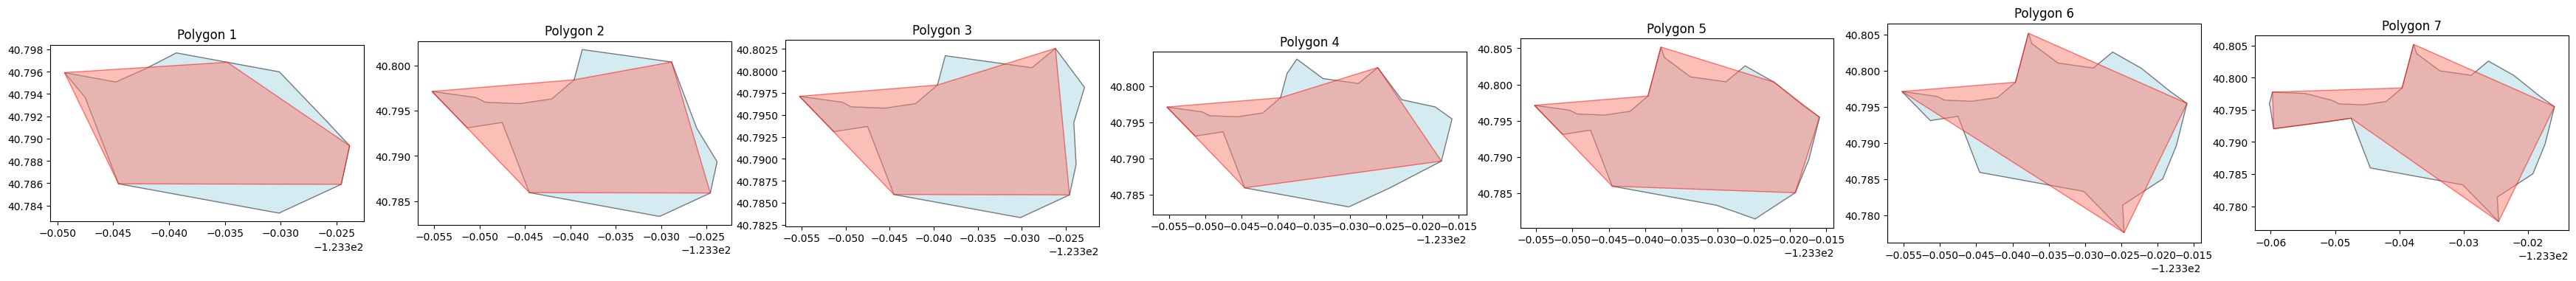

In [6]:
normal_areas = []
simplified_areas = []

def plot_fires(polygon_df, fire_name="FLAT", tolerance=0.01):
    filtered_df = polygon_df[polygon_df['FIRE_NAME'] == fire_name]
    
    if len(filtered_df) == 0:
        print(f"No polygons found for fire name: {fire_name}")
        return
    
    n_polygons = len(filtered_df)
    fig, axes = plt.subplots(1, n_polygons, figsize=(n_polygons * 5, 5))
    
    if n_polygons == 1:
        axes = [axes]
    
    for i, row in enumerate(filtered_df.itertuples()):
        polygon = row.geometry
        simplified_polygon = polygon.simplify(tolerance=tolerance)
        
        x, y = polygon.exterior.xy
        axes[i].fill(x, y, color='lightblue', edgecolor='black', alpha=0.5, label='Original Polygon')

        x_simplified, y_simplified = simplified_polygon.exterior.xy
        axes[i].fill(x_simplified, y_simplified, color='salmon', edgecolor='red', alpha=0.5, label='Simplified Polygon')

        axes[i].set_title(f"Polygon {i+1}")
        axes[i].set_aspect('equal')

    plt.tight_layout()
    plt.show()

plot_fires(polygon_df, fire_name="FLAT", tolerance=0.005)


More experiments, plotting random polygons from the dataset.

In [7]:
def plot_random_polygons(polygon_df, tolerance=0.01):
    random_indexes = random.sample(range(len(polygon_df)), 10)
    fig, axes = plt.subplots(2, 5, figsize=(15, 8))
    axes = axes.flatten()
    for i, idx in enumerate(random_indexes):
        polygon = polygon_df.geometry[idx]
        simplified_polygon = polygon.simplify(tolerance=tolerance)
        
        x, y = polygon.exterior.xy
        axes[i].fill(x, y, color='lightblue', edgecolor='black', alpha=0.5, label='Original Polygon')

        x_simplified, y_simplified = simplified_polygon.exterior.xy
        axes[i].fill(x_simplified, y_simplified, color='salmon', edgecolor='red', alpha=0.5, label='Simplified Polygon')

        axes[i].set_title(f"Polygon {idx} - Original vs Simplified")
        axes[i].set_aspect('equal')

    plt.tight_layout()
    plt.show()

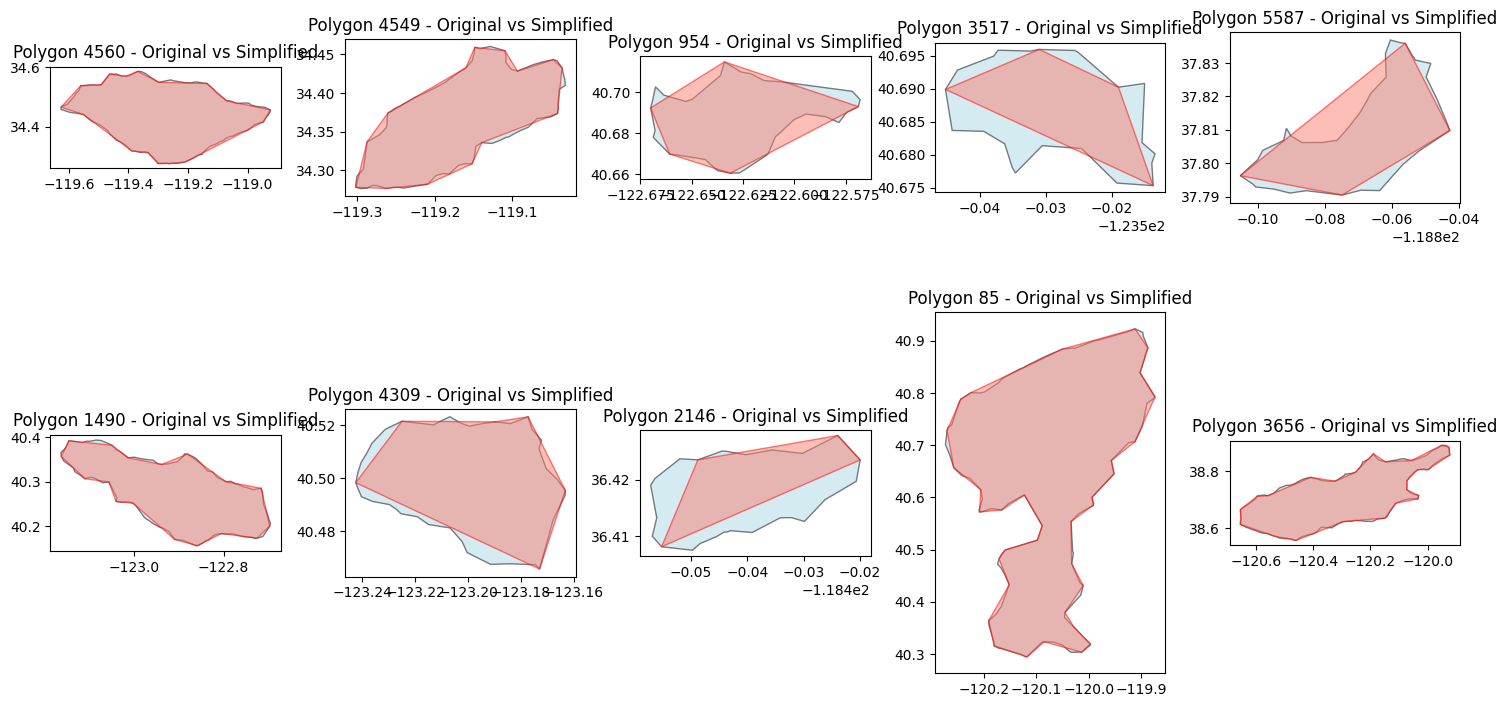

In [8]:
plot_random_polygons(polygon_df)

33
6


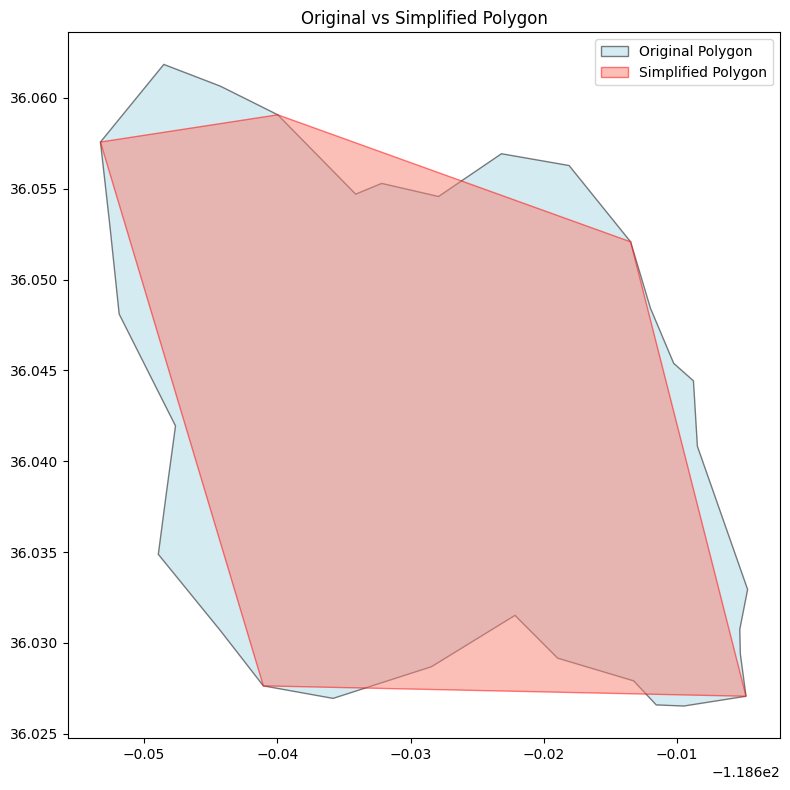

In [76]:
polygon = polygon_df.geometry[25]
simplified_polygon = polygon.simplify(tolerance=0.005)
print(len(list(polygon.exterior.coords)))
print(len(list(simplified_polygon.exterior.coords)))

fig, ax = plt.subplots(figsize=(8, 8))

x, y = polygon.exterior.xy
ax.fill(x, y, color='lightblue', edgecolor='black', alpha=0.5, label='Original Polygon')

x_simplified, y_simplified = simplified_polygon.exterior.xy
ax.fill(x_simplified, y_simplified, color='salmon', edgecolor='red', alpha=0.5, label='Simplified Polygon')

ax.legend()
ax.set_title('Original vs Simplified Polygon')

plt.tight_layout()
plt.show()

In [ ]:
polygon_df[polygon_df.FIRE_NAME == "FLAT"]

,DOY,YYYYMMDD,YEAR,geometry,FIRE_NAME,CENTROID_LAT,CENTROID_LON
0,194.429167,2012/07/12,2012.0,POLYGON ((-123.33477800000003 40.7968479999999...,FLAT,40.790442,-123.335819
1,195.412500,2012/07/13,2012.0,"POLYGON ((-123.339584 40.79840099999996, -123....",FLAT,40.792111,-123.336071
2,196.400000,2012/07/14,2012.0,"POLYGON ((-123.339584 40.79840099999996, -123....",FLAT,40.792633,-123.334991
3,197.458333,2012/07/15,2012.0,"POLYGON ((-123.339584 40.79840099999996, -123....",FLAT,40.792755,-123.332730
4,198.445833,2012/07/16,2012.0,"POLYGON ((-123.339584 40.79840099999996, -123....",FLAT,40.792319,-123.331770
5,211.412500,2012/07/29,2012.0,"POLYGON ((-123.339584 40.79840099999996, -123....",FLAT,40.792081,-123.331662
6,240.454167,2012/08/27,2012.0,"POLYGON ((-123.339584 40.79840099999996, -123....",FLAT,40.792271,-123.333336


### Individual Fires
There seem to be a wide range in terms of the number of datapoints per fire. This will complicate how we train the model. How do we want to batch the data? We can do two at a time maybe? This would allow all the data to be used. Another option is to use those with `counts > 7` or some arbitrary threshold for training, using the rest as testing data.

In [35]:
polygon_df.FIRE_NAME.value_counts().values

array([97, 86, 84, 84, 80, 76, 76, 75, 72, 70, 70, 67, 66, 64, 61, 55, 54,
       54, 53, 52, 52, 49, 48, 47, 47, 47, 44, 44, 44, 42, 41, 41, 41, 40,
       40, 40, 40, 39, 39, 38, 37, 36, 35, 35, 34, 33, 33, 33, 33, 32, 32,
       32, 31, 31, 30, 30, 29, 29, 29, 28, 28, 28, 28, 27, 27, 27, 27, 27,
       26, 26, 26, 26, 25, 25, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23,
       23, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 19,
       19, 19, 19, 19, 19, 19, 18, 18, 17, 17, 17, 16, 16, 16, 15, 15, 15,
       15, 15, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10,  9,  9,  9,  9,  9,  9,  9,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  6,  6,  6,  6

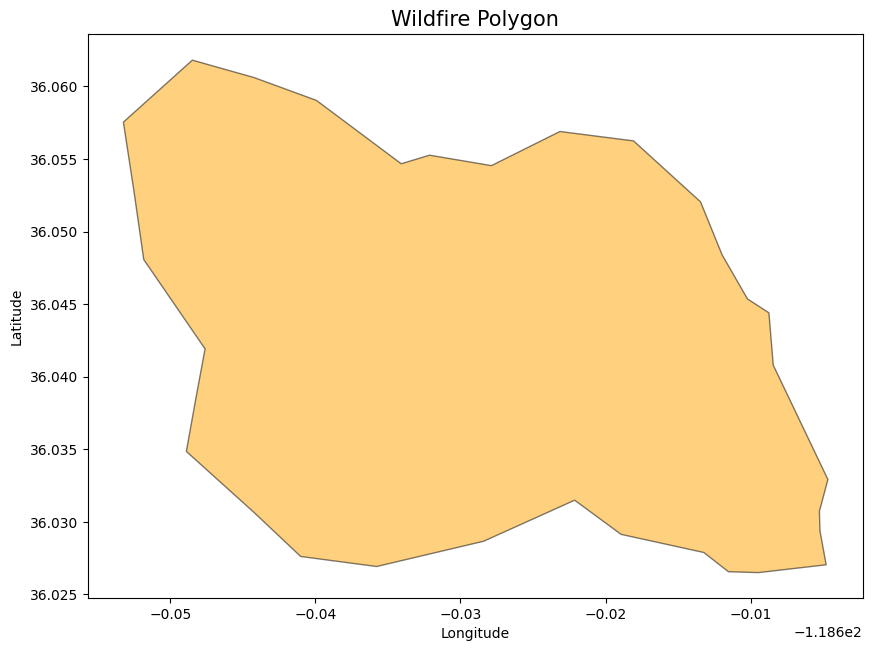

In [59]:
gdf = gpd.GeoDataFrame(geometry=[polygon_df['geometry'][25]])

gdf.plot(edgecolor='black', facecolor='orange', alpha=0.5, figsize=(10, 10))

plt.title('Wildfire Polygon', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [12]:
df = polygon_df[polygon_df.FIRE_NAME == "FLAT"]
df

,DOY,YYYYMMDD,YEAR,geometry,FIRE_NAME,CENTROID_LAT,CENTROID_LON
0,194.429167,2012/07/12,2012.0,POLYGON ((-123.33477800000003 40.7968479999999...,FLAT,40.790442,-123.335819
1,195.412500,2012/07/13,2012.0,"POLYGON ((-123.339584 40.79840099999996, -123....",FLAT,40.792111,-123.336071
2,196.400000,2012/07/14,2012.0,"POLYGON ((-123.339584 40.79840099999996, -123....",FLAT,40.792633,-123.334991
3,197.458333,2012/07/15,2012.0,"POLYGON ((-123.339584 40.79840099999996, -123....",FLAT,40.792755,-123.332730
4,198.445833,2012/07/16,2012.0,"POLYGON ((-123.339584 40.79840099999996, -123....",FLAT,40.792319,-123.331770
5,211.412500,2012/07/29,2012.0,"POLYGON ((-123.339584 40.79840099999996, -123....",FLAT,40.792081,-123.331662
6,240.454167,2012/08/27,2012.0,"POLYGON ((-123.339584 40.79840099999996, -123....",FLAT,40.792271,-123.333336


### Rasterization
Obviously the LSTM cannot take in the geospatial coordinates we have, so we need to rasterize the data (can't really think of any other way rn). Basically converting to a 2D array and masking the polygon. The following are some experiments.

The question of how to represent the data is something to think about since we maybe can represent the polygon instead as an area and a centroid, further generalizing the geospatial data, making it less specific. This is easier to work with, but obviously the prediction will not be great since its just a circle with centroid and area rather than a defined Polygon. 

Right now I experiment with rasterization for specific Polygon shape, not sure if that is the move. 

In [21]:
def simplify_polygon(geom, tolerance=0.005):
    return geom.simplify(tolerance=tolerance)

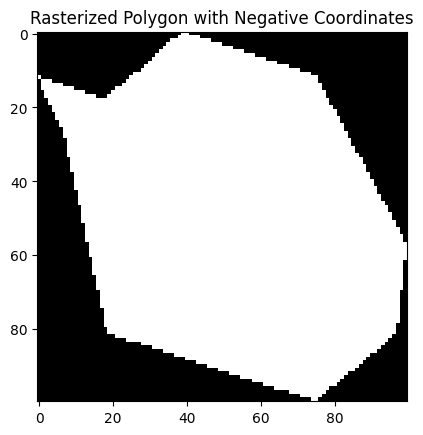

In [ ]:
import rasterio.features
import rasterio.transform
import matplotlib.pyplot as plt

poly = polygon_df.geometry[0]
minx, miny, maxx, maxy = poly.bounds
out_shape = (100, 100)
transform = rasterio.transform.from_bounds(minx, miny, maxx, maxy, out_shape[1], out_shape[0])
img = rasterio.features.rasterize([poly], out_shape=out_shape, transform=transform)

plt.imshow(img, cmap='gray')
plt.title('Rasterized Polygon with Negative Coordinates')
plt.show()


In [10]:
print(type(img))

<class 'numpy.ndarray'>


### Test with Barebone Dataset
No climate variables are added yet. I just wanted to check if the LSTM would even work on the rasterized Polygon. The `new_df` is a barebone dataframe with just the `Polygon` objects of `FIRE_NAME == "FLAT"`. `raster_sim` is a list that holds the rasterized geometry. For now I set the size as 100x100, which hopefully is detailed enough yet simple enough to reduce computational complexity. 

Future dataset: include climate variables + rasterized geometries

In [22]:
new_df = polygon_df[polygon_df.FIRE_NAME == "FLAT"].drop(columns=["YEAR", "YYYYMMDD", "DOY", "FIRE_NAME", "CENTROID_LAT", "CENTROID_LON"])
raster_sim = []
for i, v in new_df.iterrows():
    poly = simplify_polygon(v.geometry)
    minx, miny, maxx, maxy = poly.bounds
    out_shape = (100, 100)
    transform = rasterio.transform.from_bounds(minx, miny, maxx, maxy, out_shape[1], out_shape[0])
    img = rasterio.features.rasterize([poly], out_shape=out_shape, transform=transform)
    raster_sim.append(img)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

df is dataset I used, with index column and raster data from above.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

raster_size = (100, 100)
raster_data = raster_sim  

# Create a DataFrame (replace this with your actual DataFrame)
df = pd.DataFrame({
    'index': np.arange(len(raster_sim)), 
    'raster': raster_data
})
df

,index,raster
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5,5,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6,6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


### Model Attempt

For the `X` and `y` variables, I set the current raster as `X` and the next as `y` in order to create a time based sequence. In the future, we will have to think of how to train this with multiple fires since this one is just on a single fire (Flat). Flattening the data to 1D makes LSTM compatibility easier. At the end we have to reshape it back to 2D from 1D. 

Model Architecture is really simple: LSTM --> Fully Connected (linear + relu) --> Output. We can always change depending on results from training. 

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.5357
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1514
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1189
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1212
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1020
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1258
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1034
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1095
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1000
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0973
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0807
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0845
Epoch 13/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0609
Epoch 14/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0442
Epoch 15/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0418
Epoch 16/200
6/6 ━━

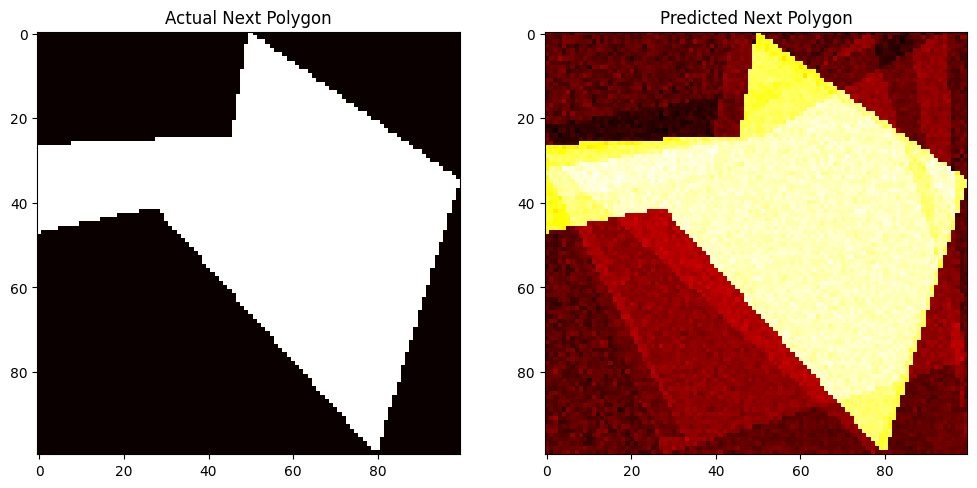

In [ ]:
# Reshaping the raster data: flatten the 2D raster --> 1D for LSTM input
X = []
y = []

for i in range(len(df) - 1):
    # Flatten the raster grids for LSTM input (for both X and y)
    X.append(df['raster'][i].flatten())
    y.append(df['raster'][i + 1].flatten())

X = np.array(X)
y = np.array(y)

# Reshaping X to be 3D (samples, time steps, features) for LSTM
X = X.reshape(X.shape[0], 1, X.shape[1])

# LSTM model Arch
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=False))
model.add(Dense(128, activation='relu'))
model.add(Dense(raster_size[0] * raster_size[1]))  # Output the flattened raster (10000) - need to convert back to 2D later

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train
model.fit(X, y, epochs=200, batch_size=1)

# Predict the next raster (for the last time step in the sequence)
last_raster = df['raster'].iloc[-1].flatten()
last_raster = last_raster.reshape(1, 1, -1)  # Reshape

predicted_raster = model.predict(last_raster)  # Predict
predicted_raster = predicted_raster.reshape(raster_size)  # Reshape

# Actual vs predicted rasters
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(df['raster'].iloc[-1], cmap='hot')
axes[0].set_title('Actual Next Polygon')

axes[1].imshow(predicted_raster, cmap='hot')
axes[1].set_title('Predicted Next Polygon')

plt.show()


### Results

Looks good but its because I trained it on literally one fire with like 6 bor 7 time points, probably will be much worse later when its not super overtrained. 

In [28]:
type(predicted_raster)

numpy.ndarray

Getting a mask is great, but we need to convert it back to a polygon, so I use contouring to get the polygon. The plot below shows the polygon outline on the mask. 

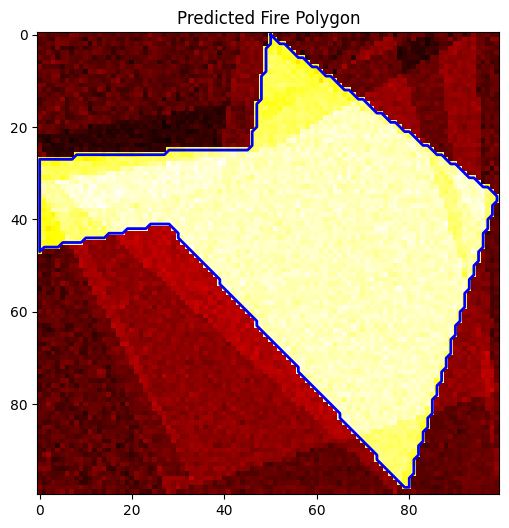

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from shapely.geometry import Polygon

# Mask to get poly
threshold_value = 0.5
binary_raster = (predicted_raster > threshold_value).astype(np.uint8)

# Get contour
contours, _ = cv2.findContours(binary_raster, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Make poly
polygon = None
for contour in contours:
    if len(contour) > 2:
        contour_points = [(point[0][0], point[0][1]) for point in contour]
        # Shapely Polygon
        polygon = Polygon(contour_points)
        break

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(predicted_raster, cmap='hot', interpolation='nearest')
if polygon is not None:
    x, y = polygon.exterior.xy
    ax.plot(x, y, color='blue', linewidth=2)

plt.title("Predicted Fire Polygon")
plt.show()

Polygon by itself. The challenge now is to convert this back to the geospatial coordinates. What we can do it just use the last raster and calculate a homography from geospatial to raster (lat long coords --> 100x100 grid). I think Affine transformation matrix should be enough since we can assume a small enough area such that the earth is basically flat. 

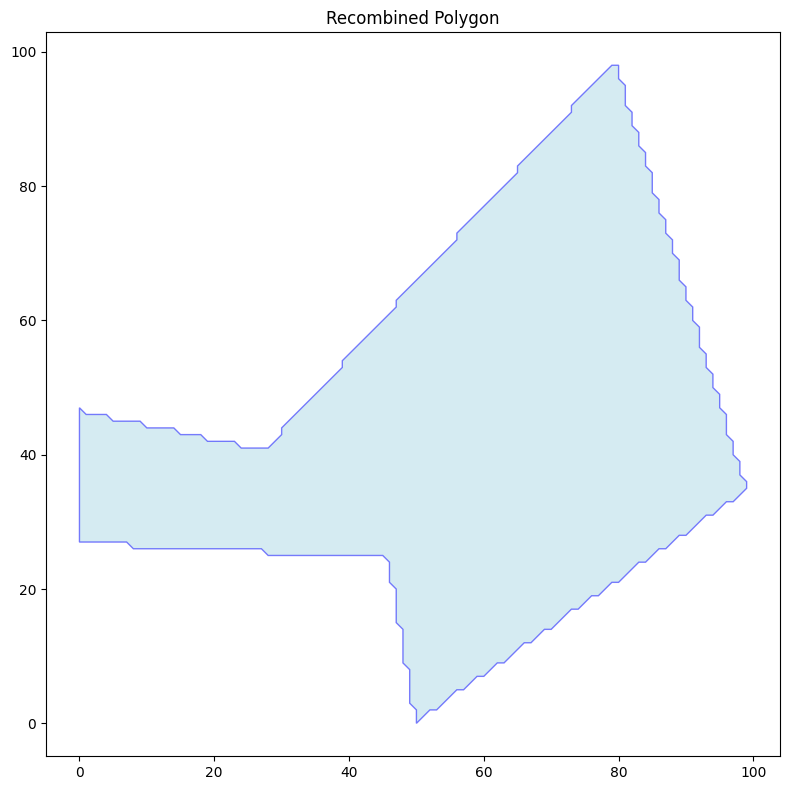

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))

x, y = polygon.exterior.xy
ax.fill(x, y, color='lightblue', edgecolor='blue', alpha=0.5, label='Original Polygon')

ax.set_title('Recombined Polygon')

plt.tight_layout()
plt.show()